# Диагностика и кривые обучения

Познакомиться на практике с явлениями недо и переобучения, научиться их выявлять путем диагностики, составлять и применять рекомендации по улучшению эффективности систем машинного обучения

In [ ]:
import numpy as np
import pandas as pd

# визуализация
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.feature_extraction import text

# train-test
from sklearn.model_selection import train_test_split

# methods
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import learning_curve

# датасет
from sklearn.datasets import load_breast_cancer

In [ ]:
cmaps = ['Accent','Accent_r','Blues','Blues_r','BrBG','BrBG_r','BuGn','BuGn_r',' BuPu','BuPu_r','CMRmap','CMRmap_r','Dark2','Dark2_r','GnBu','GnBu_r','Greens','Greens_r','Greys','Greys_r','OrRd',' OrRd_r','Oranges','Oranges_r','PRGn','PRGn_r','Paired','Paired_r','Pastel1',' Pastel1_r','Pastel2','Pastel2_r','PiYG','PiYG_r','PuBu','PuBuGn','PuBuGn_r',' PuBu_r','PuOr','PuOr_r','PuRd','PuRd_r','Purples','Purples_r','RdBu','RdBu_r',' RdGy','RdGy_r','RdPu','RdPu_r','RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Reds',' Reds_r','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral','Spectral_r',' Wistia','Wistia_r','YlGn','YlGnBu','YlGnBu_r','YlGn_r','YlOrBr','YlOrBr_r','YlOrRd',' YlOrRd_r','afmhot','afmhot_r','autumn','autumn_r','binary','binary_r','bone',' bone_r','brg','brg_r','bwr','bwr_r','cividis','cividis_r','cool','cool_r','coolwarm','coolwarm_r','copper','copper_r',' cubehelix','cubehelix_r','flag','flag_r','gist_earth','gist_earth_r','gist_gray','gist_gray_r','gist_heat','gist_heat_r','gist_ncar','gist_ncar_r',' gist_rainbow','gist_rainbow_r','gist_stern','gist_stern_r','gist_yarg',' gist_yarg_r','gnuplot','gnuplot2','gnuplot2_r','gnuplot_r','gray','gray_r',' hot','hot_r','hsv','hsv_r','icefire','icefire_r','inferno',' inferno_r','magma','magma_r','mako','mako_r',' nipy_spectral','nipy_spectral_r','ocean','ocean_r','pink','pink_r',' plasma','plasma_r','prism','prism_r','rainbow','rainbow_r',' rocket','rocket_r','seismic','seismic_r','spring','spring_r',' summer','summer_r','tab10','tab10_r','tab20','tab20_r','tab20b',' tab20b_r','tab20c','tab20c_r','terrain','terrain_r','twilight',' twilight_r','twilight_shifted','twilight_shifted_r','viridis','viridis_r','vlag','vlag_r','winter','winter_r']

Загрузите датасет breast_cancer.

In [ ]:
breast_cancer = load_breast_cancer()

Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.


In [ ]:
X = breast_cancer.data[:, :2]

In [ ]:
Y = breast_cancer.target

Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.


Затем построим первый классификатор. Оценка его точности даст нам приблизительную оценку уровня общей эффективности простых неоптимизированных моделей:

In [ ]:
classificator_1 = svm.SVC(C=0.01, kernel='rbf')
classificator_1.fit(X_train, Y_train)

SVC(C=0.01)

In [ ]:
classificator_1.score(X_train, Y_train)

0.643956043956044

In [ ]:
classificator_1.score(X_test, Y_test)

0.5877192982456141

##### Пояснение

Сами по себе данные значения мало о чем могут нам сказать. Понятно, что хотелось бы получить как можно более высокие значения. Но скорее всего вы не получите идеальную классификацию, а оценка точности будет лежать в пределах от 0 до 1. Для разных задач разная точность может считаться приемлемой. Для того, чтобы понять, можно ли повысить точность усовершенствованием модели нужно понять, какова степень обученности данной модели. Какую-то информацию может нам дать разница между этими значениями.

Если `тестовая точность близка к обучающей`, это скорее всего означает, что `модель недообучается` и при использовании более сложных моделей (или при снижении регуляризации, что эффективно то же самое) `есть надежда улучшить данный показатель`.

Если` тестовая точность значительно ниже обучающей`, это свидетельствует о `потенциальном переобучении и потере способности к переобучению`. Тогда для совершенствования модели нужно действовать в обратном направлении: использовать более простые модели или увеличивать регуляризацию данной.

Если же `тестовая точность выше обучающей`, это говорит о `наличии случайных ошибок выборки тестовой модели`. Такие ошибки неизбежно присутствуют и могут зашумлять результаты диагностики. Поэтому чаще всего для таких работ производится перекрестная проверка, которую мы будем проходить позже.

Для более точного анализа попробуем выяснить, что происходит с точностью при обучении на части обучающей выборки в зависимости от количества используемых точек. Для этого организуем обучение в цикле (обратите внимание на использование функции linspace):

##### Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
* собрать больше объектов наблюдения;
* провести обучение на меньшем объеме данных;
* исключить часть признаков из модели;
* добавить новые признаки в модель;
* добавить полиномиальные признаки;
* ✓ попробовать более сложные модели;
* попробовать более простые модели;
* увеличить регуляризацию модели;
* ✓ уменьшить регуляризацию модели;

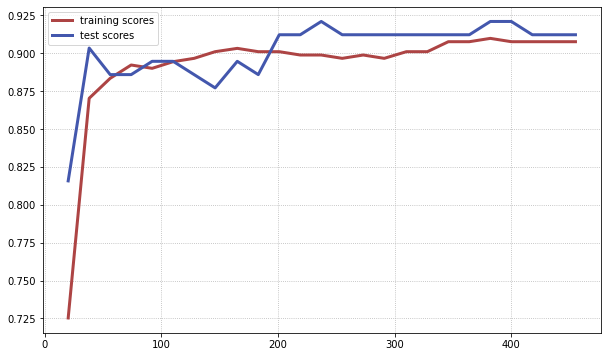

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 25):
    classificator_1 = svm.SVC(kernel='rbf')
    X = X_train[:int(i)]
    Y = Y_train[:int(i)]
    classificator_1.fit(X, Y)
    numbers.append(int(i))
    training_scores.append(classificator_1.score(X_train, Y_train))
    test_scores.append(classificator_1.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
plt.grid(linestyle=':')
plt.plot(numbers, training_scores, label="training scores", color='#AD4444', lw=3)
plt.plot(numbers, test_scores, label="test scores", color='#4357AD', lw=3)
plt.legend(loc="best")
plt.show()

Проанализировав получившийся график мы может понять более подробную картину. В частности можно видеть, что с ростом объема обучающей выборки точность на ней растет монотонно, а вот точность на тестовой резко возрастает, а затем начинает снижаться.

При анализе таких графиков следует понимать, что на реальных данных всегда будут присутствовать случайные отклонения, что приводит к зашумленности графиков. Это означает, что нужно обращать внимание на общую тенденцию, а мелкие вариации скорее всего не несут никакой полезной информации. Причем, чем меньше выборка в целом, тем больше будет вклад случайных факторов. Поэтому, в общем случае, увеличение объема данных приводит и к более точным моделям и облегчает их анализ.

Для лучшей читаемости результатов рекомендуется зафиксировать минимальное и максимальное значение по вертикальной оси, чтобы все графики, построенные в рамках данной работы были сопоставимы. Например, можно строить все графики в диапазоне y от 0,8 до 1,0.

In [ ]:
methods = {'logistic regression': LogisticRegression(),
           'svc: linear kernel': svm.SVC(kernel='linear'),
           'svc: gauss kernel': svm.SVC(kernel='rbf'),
           'svc: poly kernel': svm.SVC(kernel='poly'),
          #  'lda': LinearDiscriminantAnalysis(),
           'k neighbours': KNeighborsClassifier(),
           'mlp': MLPClassifier()}

In [ ]:
def learning_curve_plot(n, method):
  training_scores = []
  test_scores = []
  numbers = []

  for i in np.linspace(20, len(X_train), 25):
    classificator_1 = methods[method]
    X = X_train[:int(i)]
    Y = Y_train[:int(i)]
    classificator_1.fit(X, Y)
    numbers.append(int(i))
    training_scores.append(classificator_1.score(X_train, Y_train))
    test_scores.append(classificator_1.score(X_test, Y_test))

  train_score = classificator_1.score(X_train, Y_train)
  test_score = classificator_1.score(X_test, Y_test)

  ax[n//3][n%3].plot(numbers, training_scores, label=f"training scores (score={np.round(train_score,3)})", color='#AD4444', lw=3)
  ax[n//3][n%3].plot(numbers, test_scores, label=f"test scores (score={np.round(test_score,3)})", color='#4357AD', lw=3)
  ax[n//3][n%3].set_title(f"{str.capitalize(method)}")
  ax[n//3][n%3].legend(loc="best")

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,8))
plt.suptitle('Learning Curves for Different Classification Methods', fontsize=20)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)

Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.


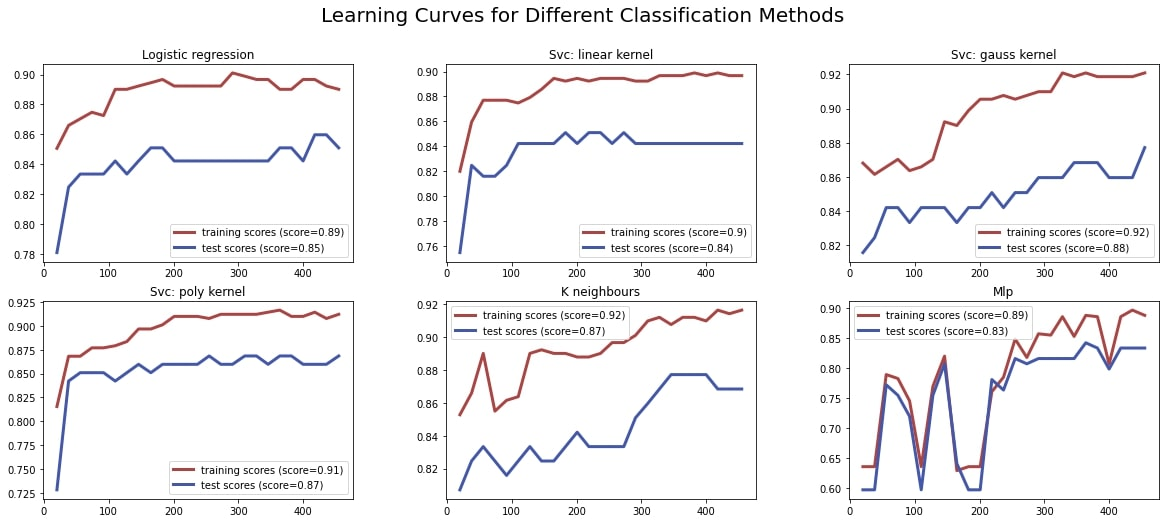

Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?


In [ ]:
methods = {'svc: gauss kernel C1': svm.SVC(C=0.0001),
          'svc: gauss kernel C2': svm.SVC(C=0.01),
          'svc: gauss kernel C3': svm.SVC(C=1),
          'svc: gauss kernel C4': svm.SVC(C=100),
          'svc: gauss kernel C5': svm.SVC(C=10000),
          'svc: gauss kernel C6': svm.SVC(C=1000000)}

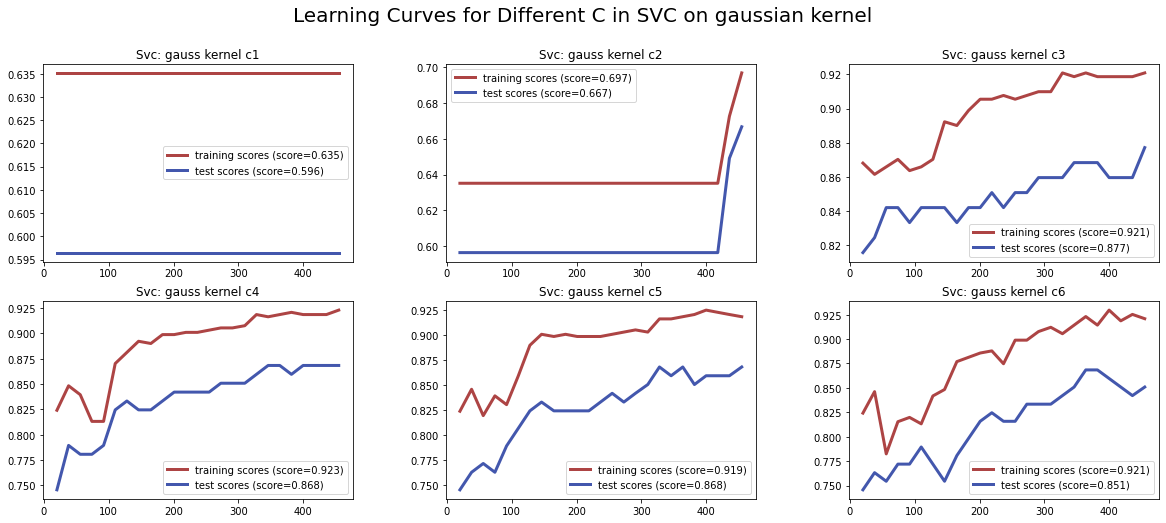

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,8))
plt.suptitle('Learning Curves for Different C in SVC on gaussian kernel', fontsize=20)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)

Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.


Найдите методом подбора оптимальное значение параметра регуляризации (примерное).


In [ ]:
methods = {'svc: gauss kernel C1': svm.SVC(C=0.95),
           'svc: gauss kernel C2': svm.SVC(C=0.98),
           'svc: gauss kernel C3': svm.SVC(C=0.995),
           'svc: gauss kernel C4': svm.SVC(C=1),
           'svc: gauss kernel C5': svm.SVC(C=1.05),
           'svc: gauss kernel C6': svm.SVC(C=1.1)}

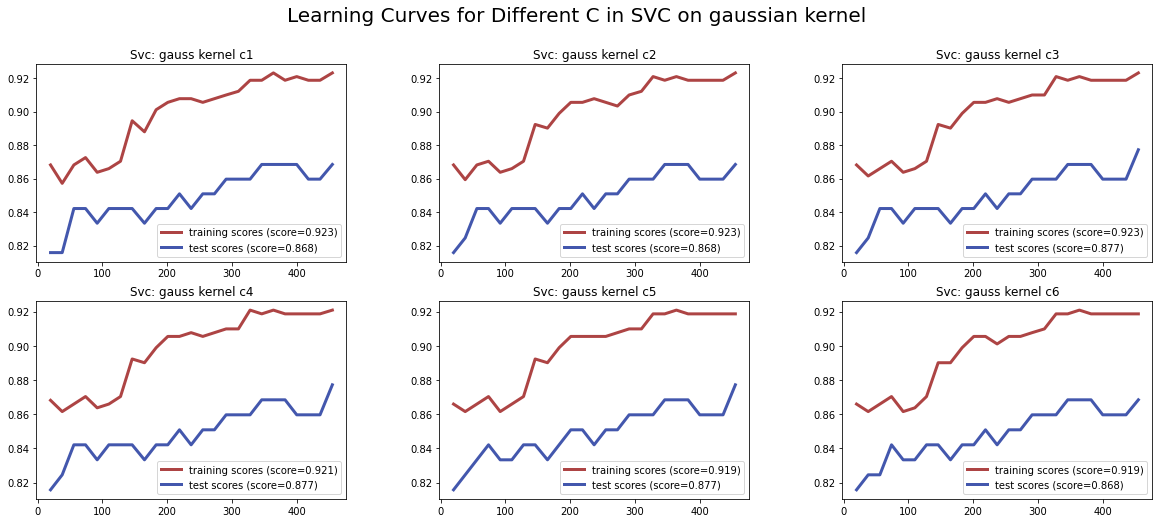

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,8))
plt.suptitle('Learning Curves for Different C in SVC on gaussian kernel', fontsize=20)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)

С=0.995 – лучший исследованный показатель

Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

In [ ]:
methods = {'svc: linear kernel C1': svm.SVC(C=0.0001, kernel='linear'),
           'svc: linear kernel C2': svm.SVC(C=0.01, kernel='linear'),
           'svc: linear kernel C3': svm.SVC(C=1, kernel='linear'),
           'svc: linear kernel C4': svm.SVC(C=100, kernel='linear'),
           'svc: linear kernel C5': svm.SVC(C=10000, kernel='linear'),
           'svc: linear kernel C6': svm.SVC(C=1000000, kernel='linear')}

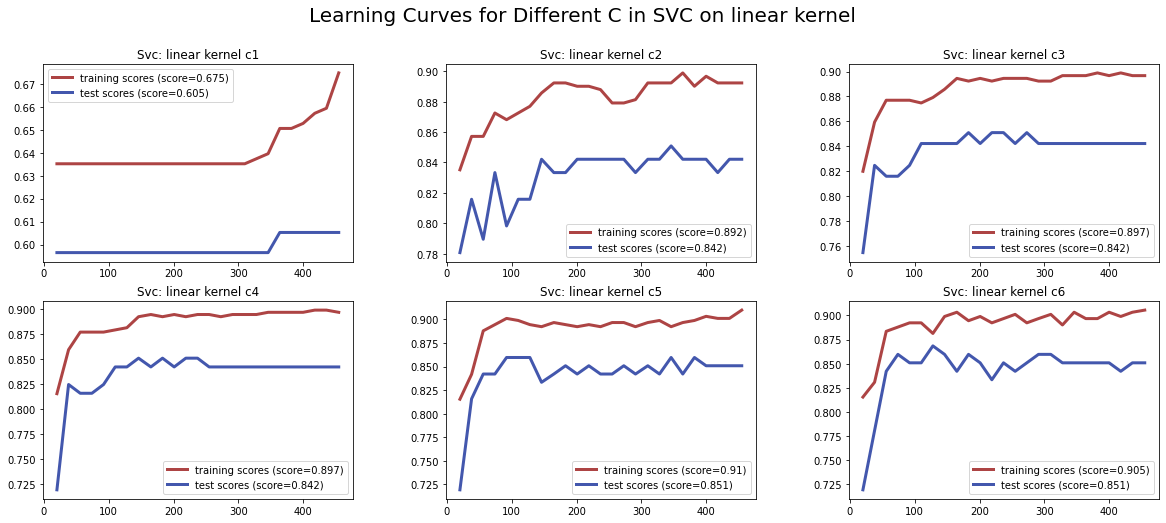

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,8))
plt.suptitle('Learning Curves for Different C in SVC on linear kernel', fontsize=20)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)

In [ ]:
methods = {'svc: linear kernel C1': svm.SVC(C=9800, kernel='linear'),
           'svc: linear kernel C2': svm.SVC(C=10000, kernel='linear'),
           'svc: linear kernel C3': svm.SVC(C=10200, kernel='linear')}

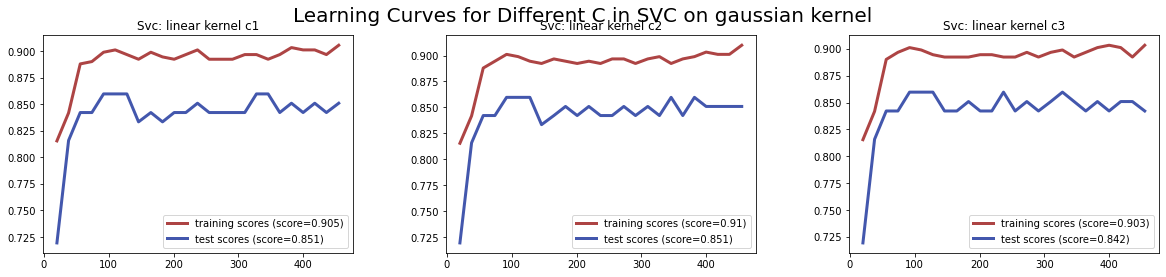

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,4))
plt.suptitle('Learning Curves for Different C in SVC on gaussian kernel', fontsize=20)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)

С=10000 – лучший исследованный показатель

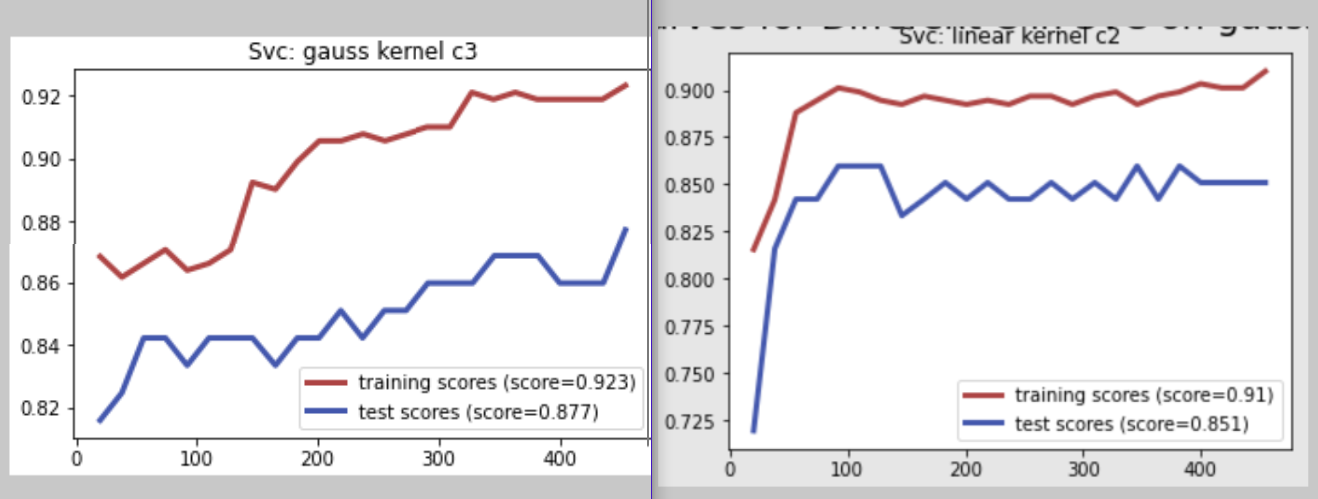

Повторите такой же анализ для полиномиального ядра и степени полинома как гиперпараметра. Прокомментируйте кривые обучения для случаев недо-и переобучения.


In [ ]:
methods = {'svc: linear kernel C1': svm.SVC(C=10, kernel='poly', degree=3),
           'svc: linear kernel C2': svm.SVC(C=10, kernel='poly', degree=5),
           'svc: linear kernel C3': svm.SVC(C=12, kernel='poly', degree=3),
           'svc: linear kernel C4': svm.SVC(C=12, kernel='poly', degree=5),
           'svc: linear kernel C5': svm.SVC(C=50, kernel='poly', degree=3),
           'svc: linear kernel C6': svm.SVC(C=50, kernel='poly', degree=5)}

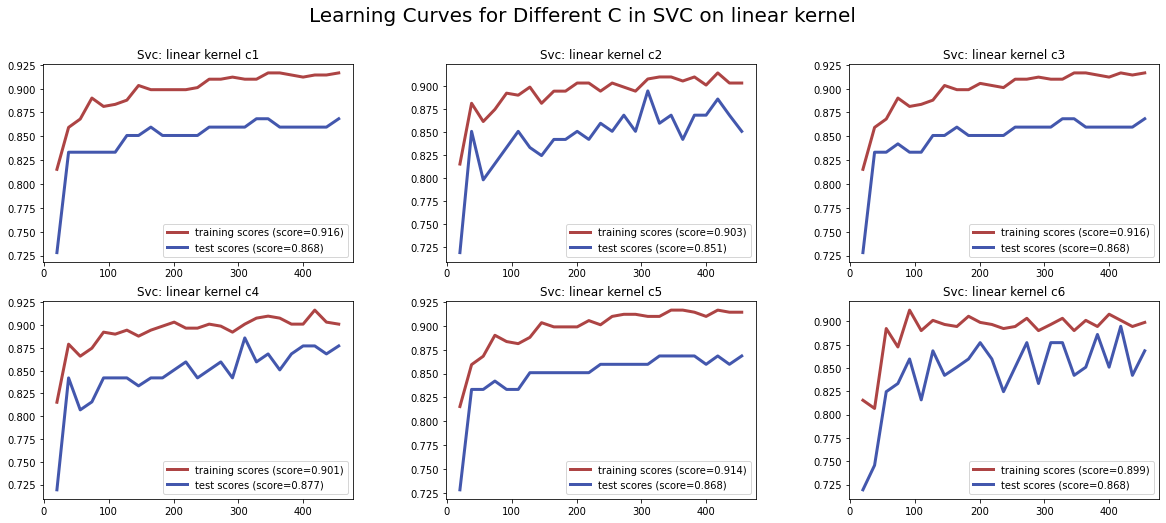

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,8))
plt.suptitle('Learning Curves for Different C in SVC on linear kernel', fontsize=20)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)

Исследуйте зависимость степени обученности модели от значения других гиперпараметров различных классификаторов, реализованных в sklearn. Постройте кривые обучения в зависимости от значения этих параметров.


Повторите данное исследование на полном датасете. Сделайте выводы об оптимальной регуляризации моделей.


In [ ]:
X = breast_cancer.data
Y = breast_cancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

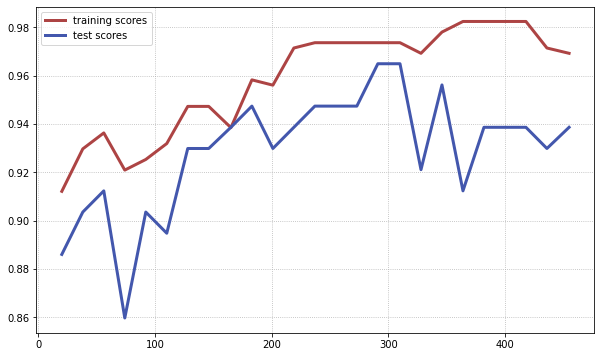

In [ ]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 25):
    classificator_1 = svm.SVC(C=10000, kernel='linear')
    X = X_train[:int(i)]
    Y = Y_train[:int(i)]
    classificator_1.fit(X, Y)
    numbers.append(int(i))
    training_scores.append(classificator_1.score(X_train, Y_train))
    test_scores.append(classificator_1.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
plt.grid(linestyle=':')
plt.plot(numbers, training_scores, label="training scores", color='#AD4444', lw=3)
plt.plot(numbers, test_scores, label="test scores", color='#4357AD', lw=3)
plt.legend(loc="best")
plt.show()

Повторите данное исследование на другом датасете. Предпочтительно выбирать более объемный набор данных для классификации (несколько тысяч примеров на каждый класс).


Напишите функцию, которая автоматизирует процесс подбора гиперпараметров данной модели путем проверки ошибок на тестовой выборке моделей с разными значениями гиперпараметра. Сравните вашу реализацию с функцией GridSearch.

Контрольные вопросы
1. Как влияет параметр С на степень регуляризации моделей классификации?

*C (параметр регуляризации) – мера степени наказания Модель (Model) за каждую неверно классифицированную точку. Большое значение C приводит к тому, что из всех возможных гиперплоскостей будет иметь приоритет тот, что совершил наименьшее количество классификационных ошибок. Низкое значение C, наоборот, выберет такую разделительную границу, что хорошо разделяет точки, допуская некоторую погрешность.*
https://www.helenkapatsa.ru/gipierparamietr-c/ 

2. Что показывает соотношение точности (ошибки) на тестовой и обучающей выборке?
*Mean absolute sqaled error*
3. Чем характеризуется ситуация недообучения? Как ее распознать на кривых обучения? А переобучение?
*Если тестовая точность близка к обучающей, это скорее всего означает, что модель недообучается. Если тестовая точность значительно ниже обучающей, это свидетельствует о потенциальном переобучении и потере способности к переобучению.*
4. Каковы рекомендации по улучшению точности модели в случае недообучения? А переобучения?
*Модель недообучается: есть надежда улучшить данный показатель при использовании более сложных моделей / или при снижении регуляризации. Потенциальное переобучение, потеря способности к переобучению: использовать более простые модели или увеличивать регуляризацию.*

5. Какова вычислительная сложность подбора гиперпараметров модели?
